# Decision Trees and Random Forests

![](https://i.imgur.com/3sw1fY9.jpg)

In this notebook, we'll continue building on the previous model to predict the price of a house using information like its location, area, no. of rooms etc. We'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

We'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model



# **Let's Start**

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.7 MB/s 


In [ ]:
import jovian

In [ ]:
jovian.commit(project='python-random-forests-assignment', privacy='secret')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's begin by installing the required libraries.

In [ ]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

     |████████████████████████████████| 9.7 MB 13.4 MB/s 
     |████████████████████████████████| 15.3 MB 36.7 MB/s 
     |████████████████████████████████| 102 kB 11.3 MB/s 


In [ ]:
# !pip install pandas numpy matplotlib seaborn --quiet

## Download and prepare the dataset for training

In [ ]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataseturl = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataseturl,'house-prices.zip')
with ZipFile('house-prices.zip') as f:
  f.extractall(path = 'house-prices')
data_dir = 'house-prices'
os.listdir(data_dir)

['train.csv', 'sample_submission.csv', 'data_description.txt', 'test.csv']

In [ ]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


Let's save our work before continuing.

In [ ]:
jovian.commit()

## Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create the model
tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
# Fit the model to the training data
%%time
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

In [ ]:
jovian.commit()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
tree_train_preds = tree.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets,tree_train_preds,squared = False)

In [ ]:
tree_val_preds = tree.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds,squared = False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 37802.872039112044


In [ ]:
bas_rmse = tree_train_rmse, tree_val_rmse
bas_rmse

(0.0, 37802.872039112044)

oh great! model completed and prediction is done. But but but, the rmse values of training set ouput and validation set output is far by a great difference which is clear indication of overfitting of our tree.

In [ ]:
# tree_val_df = pd.Series(tree_val_preds)

In [ ]:
# df = pd.concat([val_targets,tree_val_df], axis = 1, keys = ['True Values', 'Predicted values'],ignore_index = False)
# df

Let's save our work before continuing.

In [ ]:
jovian.commit()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

[Text(0.5, 0.9, 'OverallQual <= 0.722\nsquared_error = 6071445130.643\nsamples = 1095\nvalue = 181712.287'),
 Text(0.25, 0.7, 'OverallQual <= 0.611\nsquared_error = 2386768309.629\nsamples = 920\nvalue = 158805.621'),
 Text(0.125, 0.5, 'GrLivArea <= 0.197\nsquared_error = 1454831415.59\nsamples = 676\nvalue = 141623.494'),
 Text(0.0625, 0.3, 'TotalBsmtSF <= 0.159\nsquared_error = 833013851.825\nsamples = 410\nvalue = 125765.517'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'BsmtFinSF1 <= 0.042\nsquared_error = 1428211651.671\nsamples = 266\nvalue = 166066.241'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'GrLivArea <= 0.318\nsquared_error = 1884732106.418\nsamples = 244\nvalue = 206408.561'),
 Text(0.3125, 0.3, 'GarageType_Detchd <= 0.5\nsquared_error = 1092063341.786\nsamples = 194\nvalue = 194157.727'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Tex

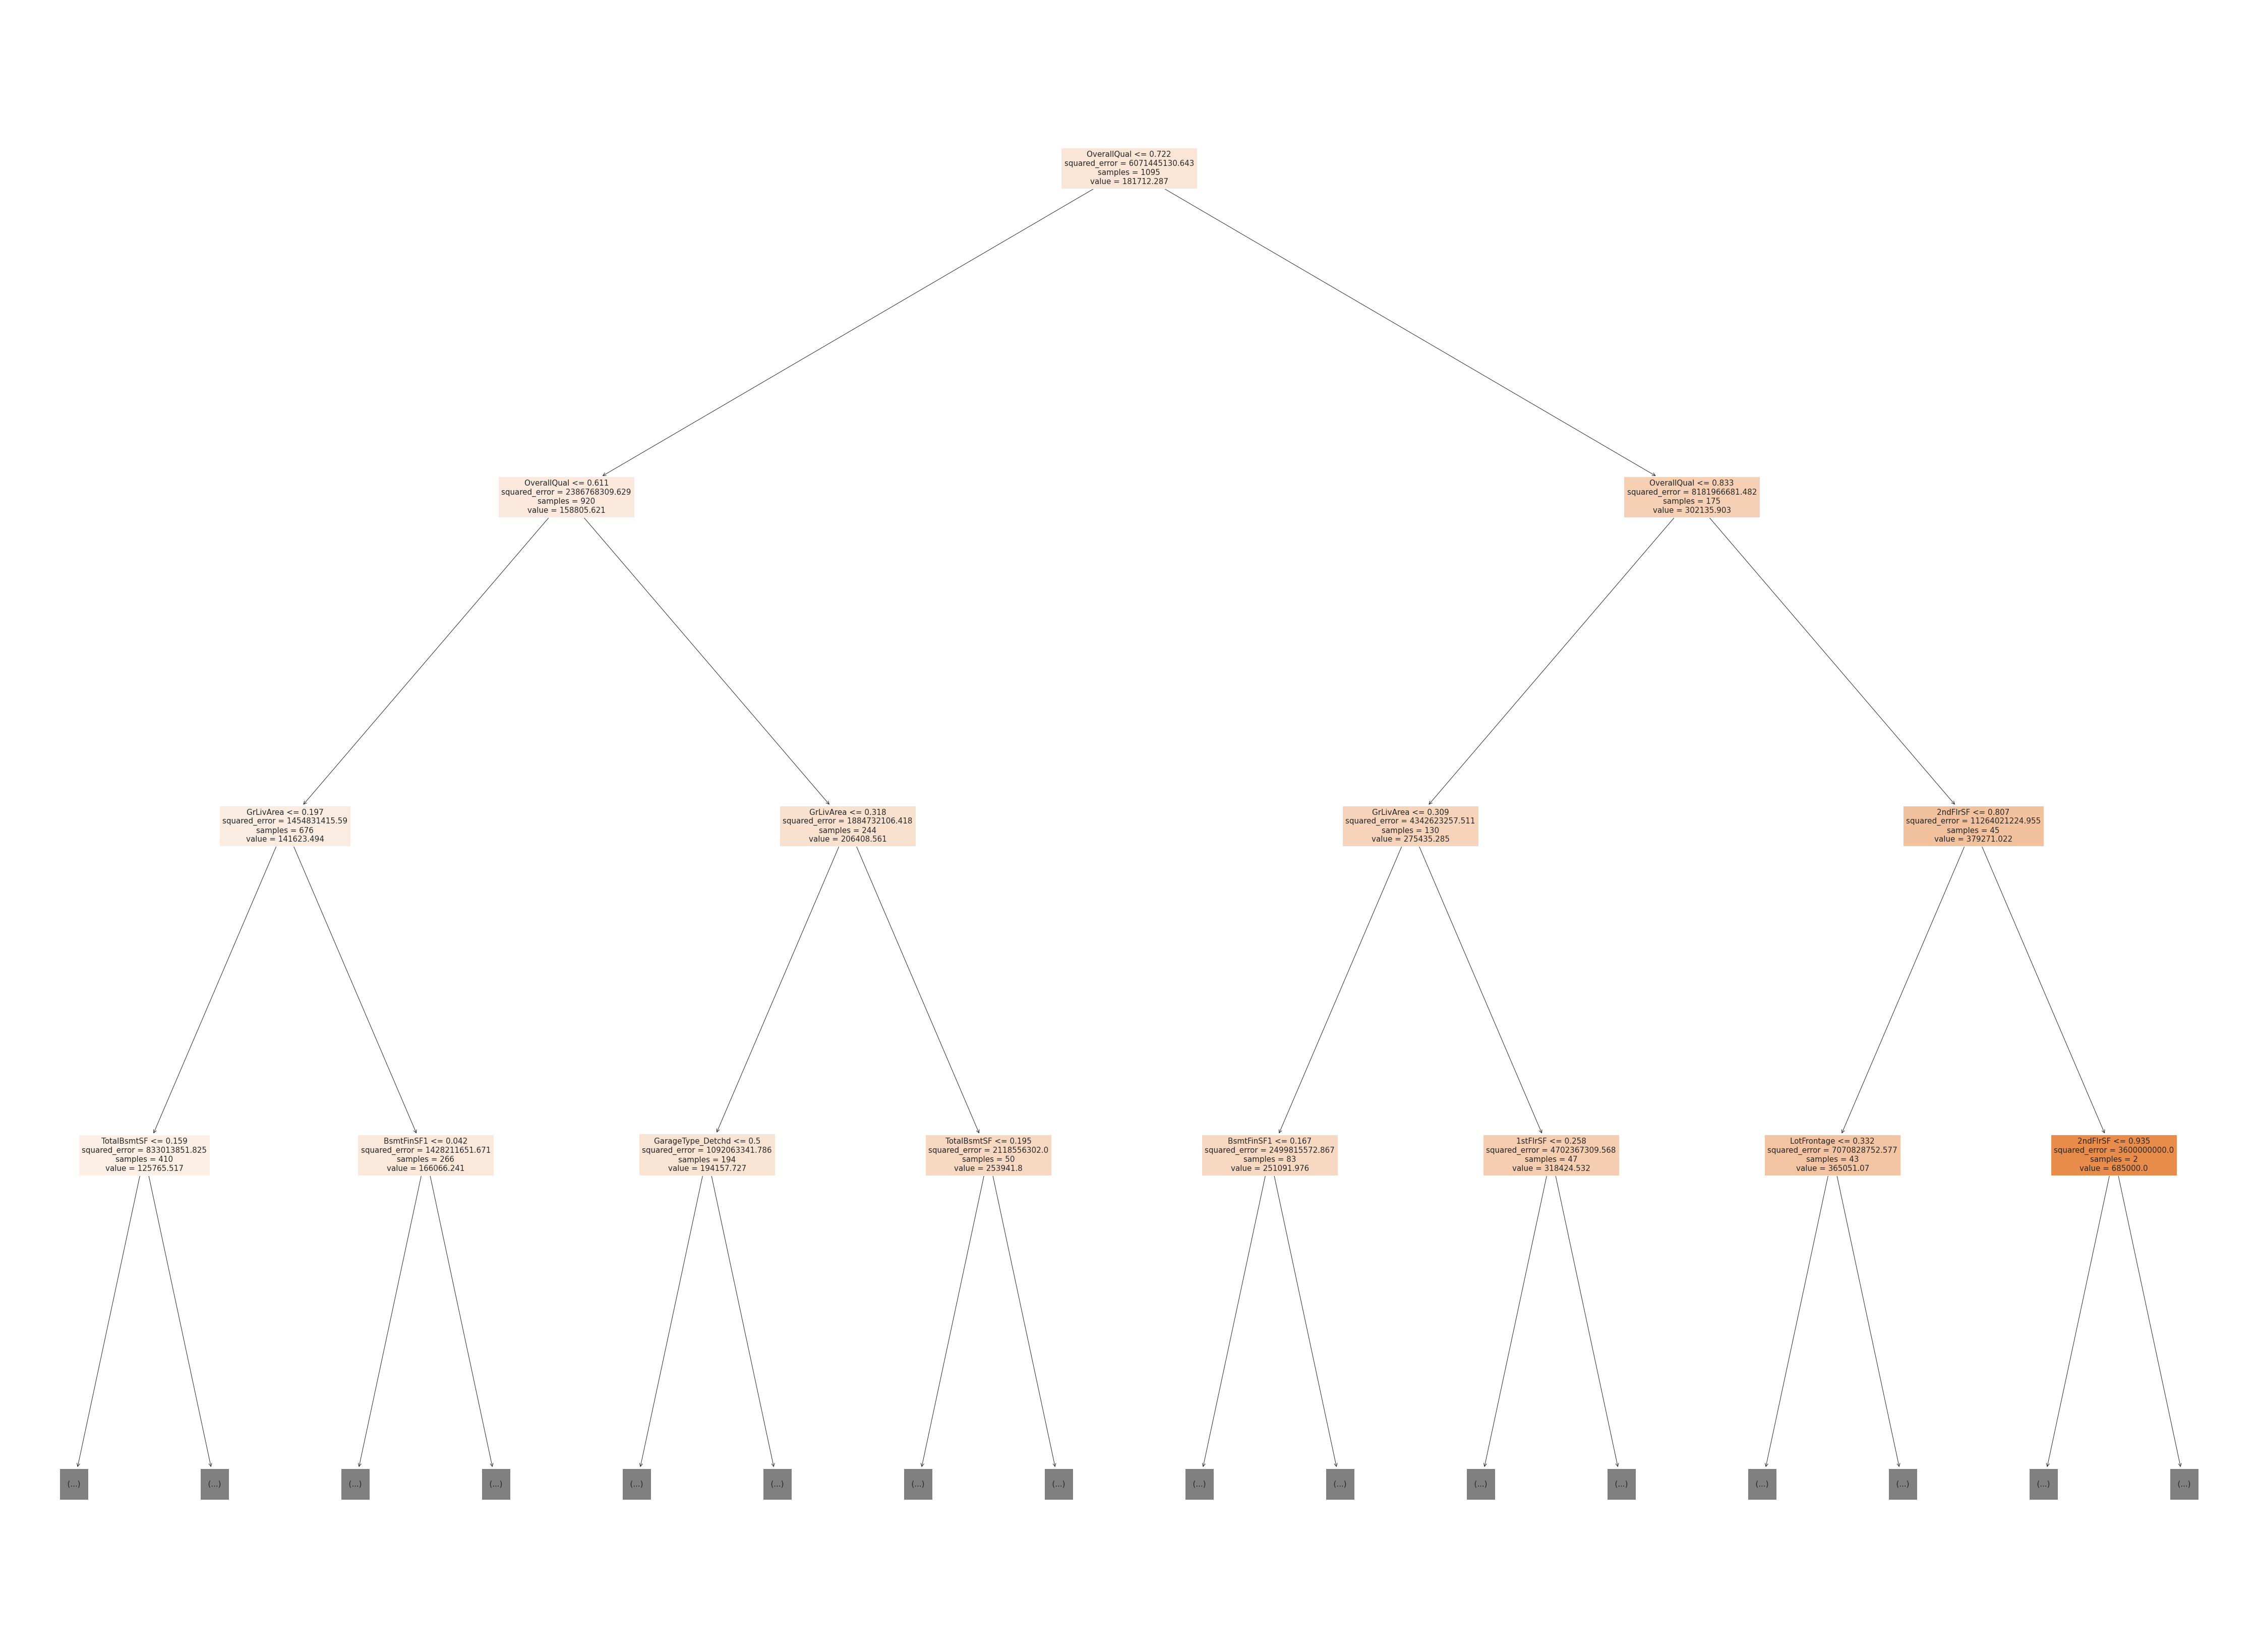

In [ ]:
plt.figure(figsize=(80,60))
# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names = train_inputs.columns, max_depth = 2, filled = True)

Authority is different !
Here are some of the interesting observations which we didn't get to find in correlation matrix. Like in our correlation matrix !stfloorSF was seems to be important but here 2ndfloorSF is used just in the 2nd decision and some more are there at top of decision authority.

In [ ]:
tree.tree_.max_depth

20

In [ ]:
# Visualize the tree textually using export_text
tree_text = export_text(tree, max_depth = 10, feature_names =list(train_inputs.columns))
print(tree_text[:4999])

In [ ]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF >  0.09
|   |   |  

In [ ]:
# Check feature importance
tree_importances = tree.feature_importances_
tree_importances

In [ ]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [ ]:
tree_importance_df.head(10)

,feature,importance
3,OverallQual,0.632537
15,GrLivArea,0.104334
13,2ndFlrSF,0.031896
11,TotalBsmtSF,0.028504
12,1stFlrSF,0.026730
8,BsmtFinSF1,0.025080
1,LotFrontage,0.022783
26,GarageArea,0.010916
34,MoSold,0.008454
24,GarageYrBlt,0.008085


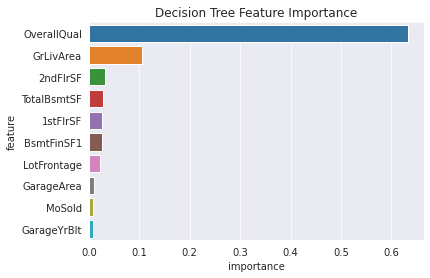

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

Aaahh!!! People are relying on overallquality too much. It has more than 6 times more contribution in decision making then the second column. This may be due to some errors in original data or it may be due to our mistake, here we should check imputation stage that do we filled lot of NA values by just mean of few rows..?

But luckily no! We have no NA in overallquality column in this dataset.

Let's save our work before continuing.

In [ ]:
jovian.commit()

## Random Forests


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the model
%%time
rf1 = RandomForestRegressor(n_jobs = -1, random_state = 42)

CPU times: user 67 µs, sys: 7 µs, total: 74 µs
Wall time: 80.1 µs


In [ ]:
# Fit the model
%%time
rf1.fit(train_inputs,train_targets)

CPU times: user 3.95 s, sys: 0 ns, total: 3.95 s
Wall time: 2.05 s


RandomForestRegressor(n_jobs=-1, random_state=42)

Let's save our work before continuing.

In [ ]:
jovian.commit()

In [ ]:
rf1_train_preds = rf1.predict(train_inputs)

In [ ]:
rf1_train_rmse = mean_squared_error(train_targets,rf1_train_preds,squared = False)
rf1_train_rmse 

11864.318299877767

In [ ]:
# rf1_train_rmsen1 = mean_squared_error(rf1_train_preds,train_targets,squared = False)
# rf1_train_rmsen,rf1_train_rmsen1

(140762048.72081444, 11864.318299877767)

In [ ]:
rf1_val_preds = rf1.predict(val_inputs)

In [ ]:
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds,squared = False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 11864.318299877767, Validation RMSE: 27830.03863639856


However, still we have large mean square error but still we can see it is better than our overfitted model which was having the validation error in 10 digits

In [ ]:
bas_rmse[1]-rf1_val_rmse

9972.833402713484

Here, see the difference between the prediction of both the models which is so large

Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [ ]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

It can be used as follows:

In [ ]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [ ]:
%%time
test_params(n_estimators=500, max_depth=20, min_samples_leaf=4, max_features=0.4)

CPU times: user 6.09 s, sys: 100 ms, total: 6.19 s
Wall time: 3.42 s


(19742.02195366896, 28323.259805426424)

Let's also define a helper function to test and plot different values of a single parameter.

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        # print(value)
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

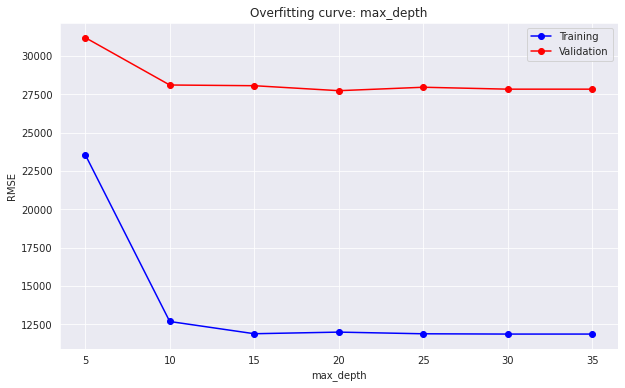

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

CPU times: user 3min 20s, sys: 1.22 s, total: 3min 21s
Wall time: 1min 50s


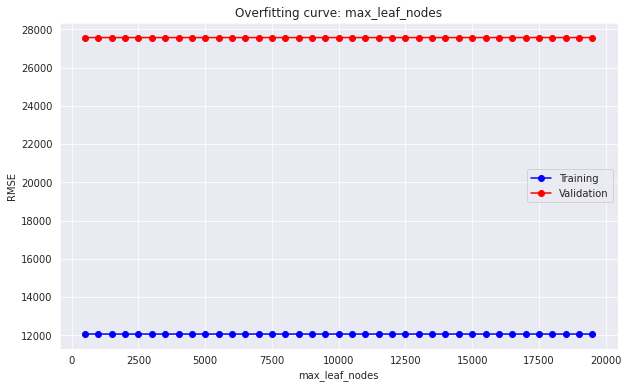

In [ ]:
%%time
test_param_and_plot('max_leaf_nodes',[x for x in range(500,20000,500)])

From the graph it looks that their is no decent in advancement of validation error even for higher values of **max_leaf_nodes**. From the graph it look 250 is good values which is plotted below

CPU times: user 3min 5s, sys: 951 ms, total: 3min 6s
Wall time: 1min 36s


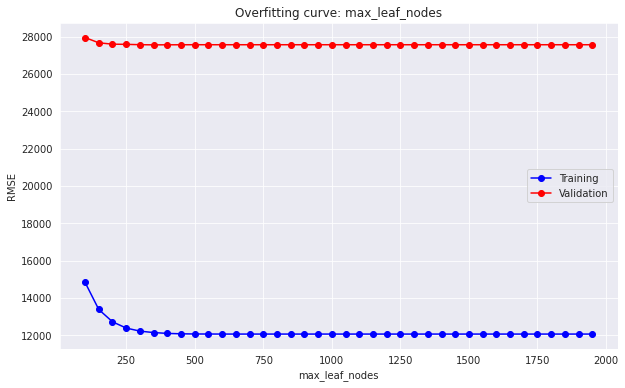

In [ ]:
%%time
test_param_and_plot('max_leaf_nodes',[x for x in range(100,2000,50)])

From the graph it looks that their is no decent in advancement of validation error even for higher values of **max_leaf_nodes**. From the graph it look 250 is good values

Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


> We Use the `test_params` and `test_param_and_plot` functions to experiment with different values of the  hyperparmeters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_features`, `max_leaf_nodes`, `min_impurity_decrease`, `min_impurity_split` etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
test_param_and_plot('n_estimators',[x for x in range(25,200,25)])

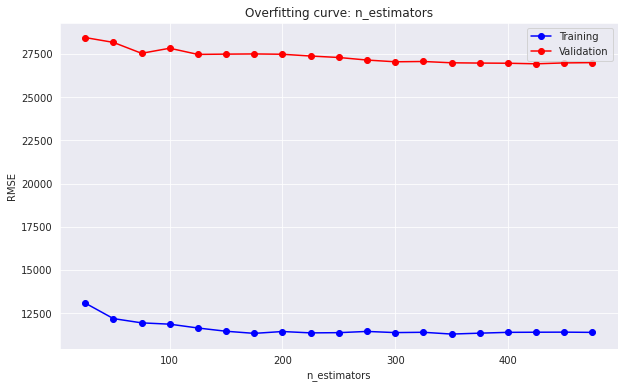

In [ ]:
test_param_and_plot('n_estimators',[x for x in range(25,500,25)])

It looks as the number of trees are increasing in our forest, the validation error is decreasing which is good thing but the change is very minor which weighs more than the time which is consumed by tree for calculation. Here, the maximum 400 trees is around optimum.

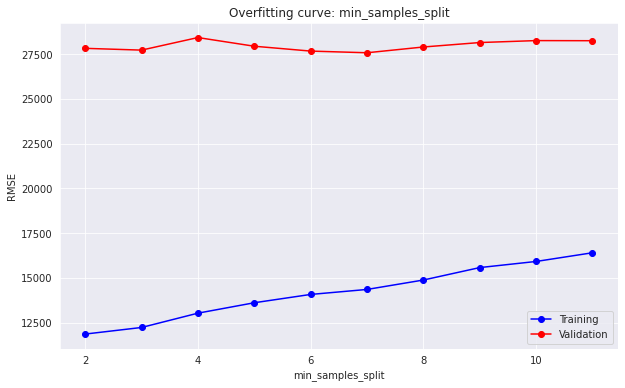

In [ ]:
test_param_and_plot('min_samples_split',[x for x in range(2,12)])

Min_samples_splits have a low validation error around 7.

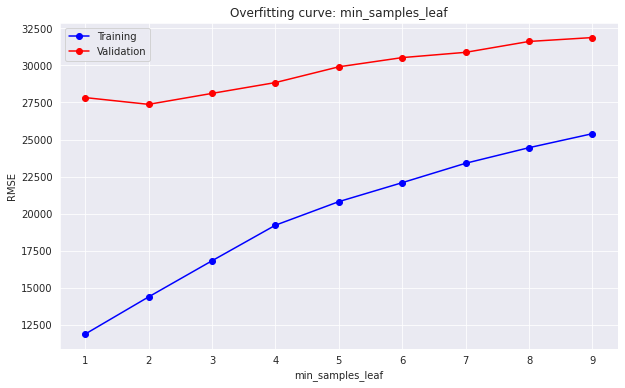

In [ ]:
test_param_and_plot('min_samples_leaf', [x for x in range(1,10)])

As the number of minimum samples leaf is increasing, not only training error but also validation error is increasing. And value around 2 will lead to fair justice with validation error.

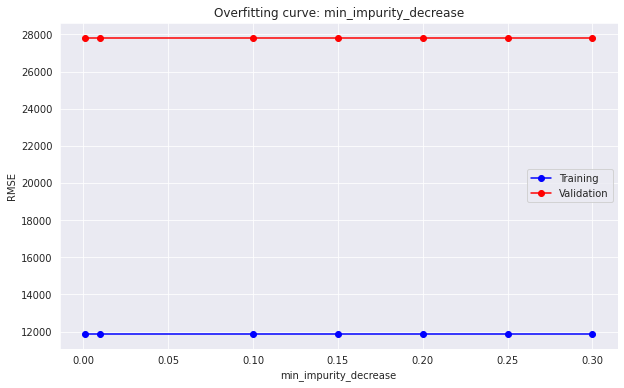

In [ ]:
test_param_and_plot('min_impurity_decrease',[0.001,0.01,0.1,0.15,0.2,0.25,0.3])

No noticable change in calidation error for change in inpurity decrease. Around 0.1 is looks ok type.

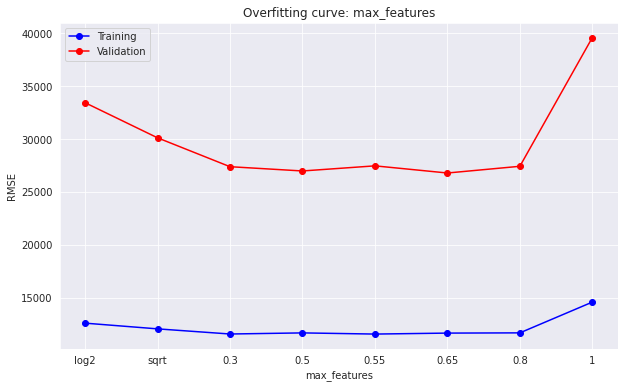

In [ ]:
test_param_and_plot('max_features',['log2','sqrt',0.3,0.5,0.55,0.65,0.8,1,])

Aahh, Finally the error is below 28k and the value of max_feature is around 0.65

Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Training the Best Model

In [ ]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(n_estimators = 400, max_depth = 7, 
                            max_features = 0.65, min_samples_leaf= 2, min_samples_split= 7, max_leaf_nodes = 300, random_state = 42, n_jobs = -1)

In [ ]:
# Train the model
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=7, max_features=0.65, max_leaf_nodes=300,
                      min_samples_leaf=2, min_samples_split=7, n_estimators=400,
                      n_jobs=-1, random_state=42)

Let's save our work before continuing.

In [ ]:
jovian.commit()

In [ ]:
rf2_train_preds = rf2.predict(train_inputs)

In [ ]:
rf2_train_rmse = mean_squared_error(rf2_train_preds,train_targets,squared = False)

In [ ]:
rf2_val_preds = rf2.predict(val_inputs)

In [ ]:
rf2_val_rmse = mean_squared_error(rf2_val_preds,val_targets,squared = False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 18661.248103146376, Validation RMSE: 27820.60543048778


Looks nicer, We are on the other side of 28000 which was not looking reachable by using all hyperparameters alone. 

Let's also view and plot the feature importances.

In [ ]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
rf2_importance_df.head(10)

,feature,importance
3,OverallQual,0.448057
15,GrLivArea,0.126810
25,GarageCars,0.073546
172,ExterQual_TA,0.038800
11,TotalBsmtSF,0.035585
8,BsmtFinSF1,0.026531
13,2ndFlrSF,0.026431
12,1stFlrSF,0.026091
5,YearBuilt,0.026002
26,GarageArea,0.019123


Still OverallQuality is the sun of decision making in this dataset but now it is not 6 times higher than the second most important index. It is around 3.5 times

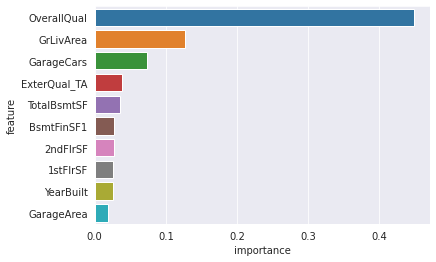

In [ ]:
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature')

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [ ]:
test_df = pd.read_csv('house-prices/test.csv')

In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

First, we need to reapply all the preprocessing steps.

In [ ]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [ ]:
test_preds = rf2.predict(test_inputs)

In [ ]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [ ]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Let's replace the values of the `SalePrice` column with our predictions.

In [ ]:
submission_df['SalePrice'] = test_preds

Let's save it as a CSV file and download it.

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/content/submission.csv

We can now submit this file to the competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

![](https://i.imgur.com/6h2vXRq.png)


Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Making Predictions on Single Inputs

In [ ]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [ ]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [ ]:
predicted_price = predict_input(rf2, sample_input)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $124203.88697675588


> **EXERCISE**: Change the sample input above and make predictions. Try different examples and try to figure out which columns have a big impact on the sale price. Hint: Look at the feature importance to decide which columns to try.

### Saving the Model

In [ ]:
import joblib

In [ ]:
house_prices_rf = {
    'model': rf2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(house_prices_rf, 'house_prices_rf.joblib')

['house_prices_rf.joblib']

Let's save our work before continuing.

In [ ]:
jovian.commit(outputs=['house_prices_rf.joblib'])

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Predicting the Logarithm of Sale Price

> **(OPTIONAL) QUESTION**: In the [original Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation), the model is evaluated by computing the Root Mean Squared Error on the logarithm of the sale price. Try training a random forest to predict the logarithm of the sale price, instead of the actual sales price and see if the results you obtain are better than the models trained above.